# DAV 6150 Module 11 Assignment
#### Group Member: Shichao Zhou, Yifeng Lin

## Introduction

Our task for the Module 11 Assignment is to compare the performance of a decision tree vs. a random forest. 
The data set we will be working with is comprised of more than 73,000 observations, each of which pertains to a 
particular NY State school district and associated subgroupings/categorizations of high school students who 
had been enrolled for at least 4 years as of the end of the 2018-2019 school year. The data source is from 
https://yu.instructure.com/courses/50398/assignments/191939.

Steps explanation:
- Data Dictionary
- Load dataset  into a Pandas dataframe
- Exploratory Data Analysis
- Data Preparation
  - create a new indicator variable named “reg_pct_level”
  - One hot encoding for categorical data
- Prepped Data Review (Re-run EDA)
- Decision Tree + Random Forest Modeling 
  - Feature selection 
  - Decision tree Model1 
  - Decision tree Model2
  - Random forest Model1
  - Random forest Model2
- Select Models 
- Conclusion
- Reference

## Data Dictionary

- report_school_year: Indicates school year for which high school graduation info is being reported
- aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
- aggregation_type: Text description of how high school graduation data has been aggregated
- nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
- nrc_desc: Text description of the type of school district
- county_code: Numeric code for county name
- county_name: Full name of applicable NY State county
- nyc_ind: Indicates whether or not the school district resides within the borders of NYC
- membership_desc: Indicates school year in which students first enrolled in High School
- subgroup_code: Numeric code identifying student subgrouping
- subgroup_name: Text description of student subgrouping
- enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
- grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
- grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
- local_cnt:  How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
- local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
- reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non diploma credential
- non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
- still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
- ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
- dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
- dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year

# Load data

In [1]:
import pandas as pd
import numpy as np
# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt
# Import seaborn 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read data
data = pd.read_csv('https://raw.githubusercontent.com/675874815/DAV-5401/master/Project1_Data.csv')
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [3]:
# Check data size
data.shape

(73152, 29)

## Exploratory Data Analysis

Categorical Variables:
+ report_school_year
+ aggregation_index
+ aggregation_type
+ nrc_code
+ nrc_desc
+ county_code
+ county_name
+ nyc_ind
+ membership_desc
+ subgroup_code
+ subgroup_name

Numerical Variables:
+ enroll_cnt
+ grad_cnt
+ grad_pct
+ local_cnt
+ local_pct
+ reg_cnt ( It will be removed from the dataframe after a new indicator variable named"reg_pct_level" be created.)
+ reg_pct ( It will be removed from the dataframe after a new indicator variable named"reg_pct_level" be created.)
+ reg_adv_cnt
+ reg_adv_pct
+ non_diploma_credential_cnt
+ non_diploma_credential_pct
+ still_enrolled_cnt
+ still_enrolled_pct
+ ged_cnt
+ ged_pct
+ dropout_cnt
+ dropout_pct

Reponse Variable:
+ A new indicator variable named “reg_pct_level” has three possible categorizations: "low", "medium", and "high".

In [4]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [5]:
# Replace '-' with nan
data.replace('-',np.nan,inplace = True)

In [6]:
# Check the number of null values 
data.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

In [7]:
# Remove null values
data = data.dropna()

In [8]:
# Check unique for each columns
data.nunique()

report_school_year               1
aggregation_index                1
aggregation_type                 1
aggregation_name               677
nrc_code                         6
nrc_desc                         6
county_code                     62
county_name                     62
nyc_ind                          2
membership_desc                  6
subgroup_code                   24
subgroup_name                   24
enroll_cnt                    1463
grad_cnt                      1714
grad_pct                       100
local_cnt                      331
local_pct                       80
reg_cnt                       1289
reg_pct                        101
reg_adv_cnt                    781
reg_adv_pct                     99
non_diploma_credential_cnt      75
non_diploma_credential_pct      46
still_enr_cnt                  407
still_enr_pct                   84
ged_cnt                         77
ged_pct                         31
dropout_cnt                    444
dropout_pct         

From the above output, we can find report_school_year,aggregation_index and aggregation_type have unique values. These three explanatory variables have no use-value. In addition, we will also delete aggregation_name because we found that aggregation_name is not mentioned in the data dictionary, and the aggregation_index and aggregation_index related to it have been deleted，So it doesn't make much sense to leave it for a separate analysis.

In [9]:
data.drop(['report_school_year','aggregation_index','aggregation_type','aggregation_name'],axis=1,inplace=True)

In [10]:
# Convert percentage into float data
def covert_numeric(col):
    data[col] = data[col].apply(str).replace("%","",regex = True).astype(float)/100 
    return data[col]
data['grad_pct'] = covert_numeric('grad_pct')
data['local_pct'] = covert_numeric('local_pct')
data['reg_pct'] = covert_numeric('reg_pct')
data['reg_adv_pct'] = covert_numeric('reg_adv_pct')
data['non_diploma_credential_pct'] = covert_numeric('non_diploma_credential_pct')
data['ged_pct'] = covert_numeric('ged_pct')
data['dropout_pct'] = covert_numeric('dropout_pct')
data['still_enr_pct'] = covert_numeric('still_enr_pct')

In [11]:
# Covert string into numeric
data["enroll_cnt"] = data["enroll_cnt"].astype("float64")
data["grad_cnt"] = data["grad_cnt"].astype("float64")
data["local_cnt"] = data["local_cnt"].astype("float64")
data["reg_cnt"] = data["reg_cnt"].astype("float64")
data["reg_adv_cnt"] = data["reg_adv_cnt"].astype("float64")
data["non_diploma_credential_cnt"] = data["non_diploma_credential_cnt"].astype("float64")
data["ged_cnt"] = data["ged_cnt"].astype("float64")
data["dropout_cnt"] = data["dropout_cnt"].astype("float64")
data["still_enr_cnt"] = data["still_enr_cnt"].astype("float64")

Numercial data

In [12]:
data_num = data[['enroll_cnt','grad_cnt','grad_pct','local_cnt','local_pct','reg_cnt','reg_pct','reg_adv_cnt','reg_adv_pct','non_diploma_credential_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','ged_cnt','ged_pct','dropout_cnt','dropout_pct']]

In [13]:
# Turn the names of columns into list
column_num=data_num.columns.to_list()

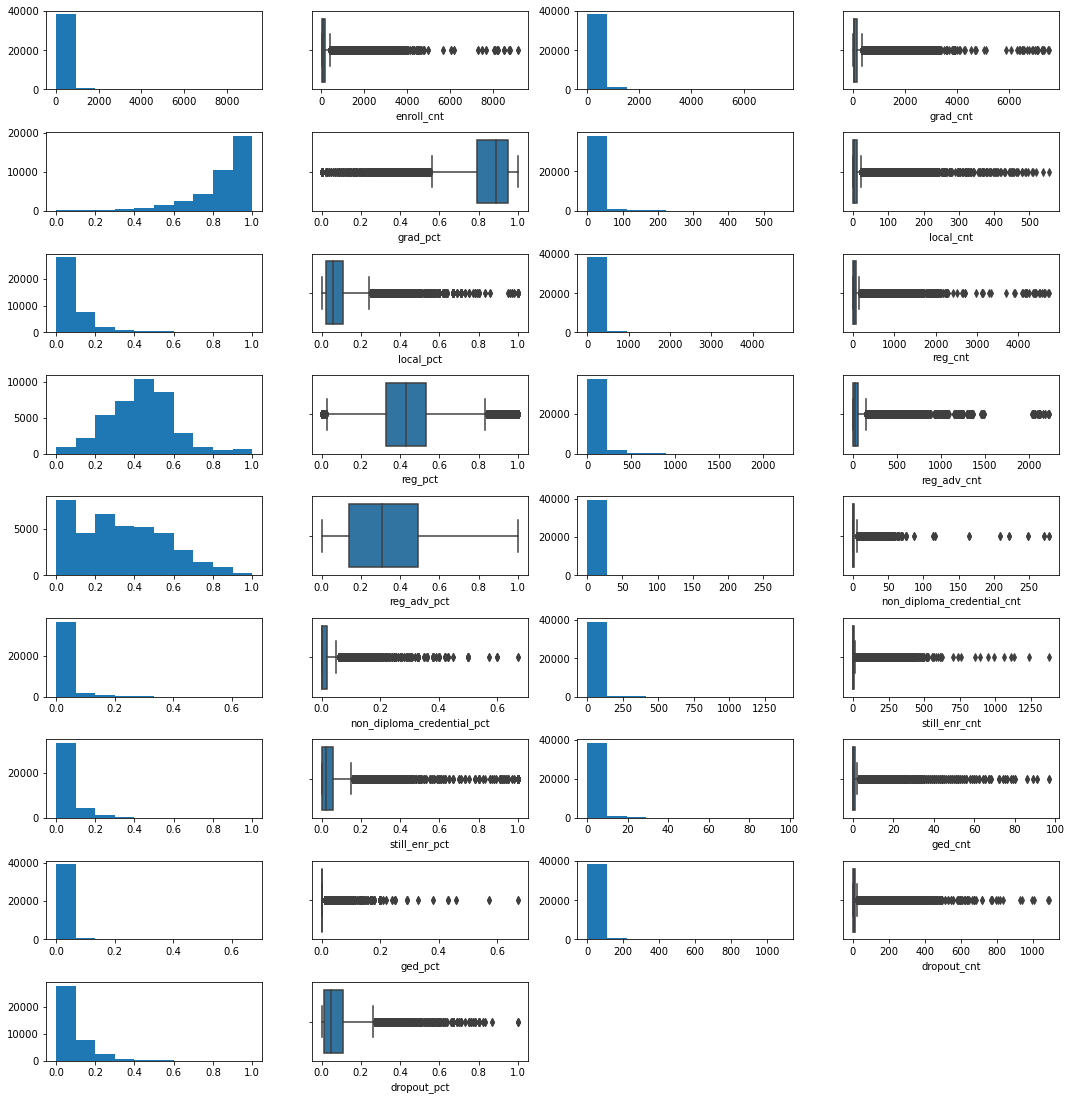

In [14]:
# Show the histogram and the boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(17):
    n=2*i
    plt.subplot(12,4,n+1)
    plt.hist(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    sns.boxplot(data_num[column_num[i]])
    
plt.tight_layout()

- Null negative outliers for each attribute.
- enroll cnt & grad cnt : The 'enroll cnt' and 'grad cnt' attributes have very similar data distribution and outliers. The number of student enrollment and graduation is mainly between 0-2000 range. But the enrollment count has outliers over the 6000-8000 range during the given school year, and the graduation count has outliers over 6000 at the end of the given school year.
- The attributes of local_pnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,ged_cnt are relevant to the number of award a kind of diploma. The following describes the distribution interval of the data one by one.
 - local_pnt: The number of enrolled students of the indicated subgrouping who were awarded a "Local" diploma is mainly between 0-200 at the end of the given school year.
 - reg_cnt: The number of enrolled students of the indicated subgrouping was awarded a "Regents" diploma is mainly between 0-1000 at the end of the given school year. The outliers lie in the range over 2000.
 - reg_adv_cnt: The number of enrolled students of the indicated subgrouping was awarded a "Regents Advanced" diploma is mainly between 0-500 at the end of the given school year. The outliers lie in the range of over 1000.
 - non_diploma_credential_cnt: The number of enrolled students of the indicated subgrouping who achieved a non-diploma credential is mainly between 0-25 at the end of the given school year. The outliers lie in the range over 50.
 - ged_cnt: The number of enrolled students of the indicated subgrouping awarded a "GED" diploma is mainly between 0-30 at the end of the given school year. The outliers lie in the range over 60.
- still_enrolled_cnt: The attribute of still_enrolled_cnt shows the data distribution range from 0-500.
- dropout_cnt: The attribute of dropout_cnt shows the data distribution range from 0-200 during the school year.

- grad_pct: The percentage of enrolled students of the indicated subgrouping graduated at the end of the given school year mainly ranges from 0.4-0.9. The data outliers are between 0.0-0.2.
- local_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma range from 0.0-0.2. The data outliers are over 0.4.
- reg_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma range from 0.2-0.6. The data outliers are over 0.8.
- reg_adv_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced"  diploma range from 0.0-0.6.
- non_diploma_credential_pct: The percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential diploma range from 0.0-0.2. The data outliers are over 0.2.
- ged_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma range from 0.0-0.2. The data outliers are over 0.2.
- still_enrolled_pct: The percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled range from 0.0-0.2. The data outliers are over 0.3.
- dropout_pct: The percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year range from 0.0-0.4. The data outliers are over 0.4. 


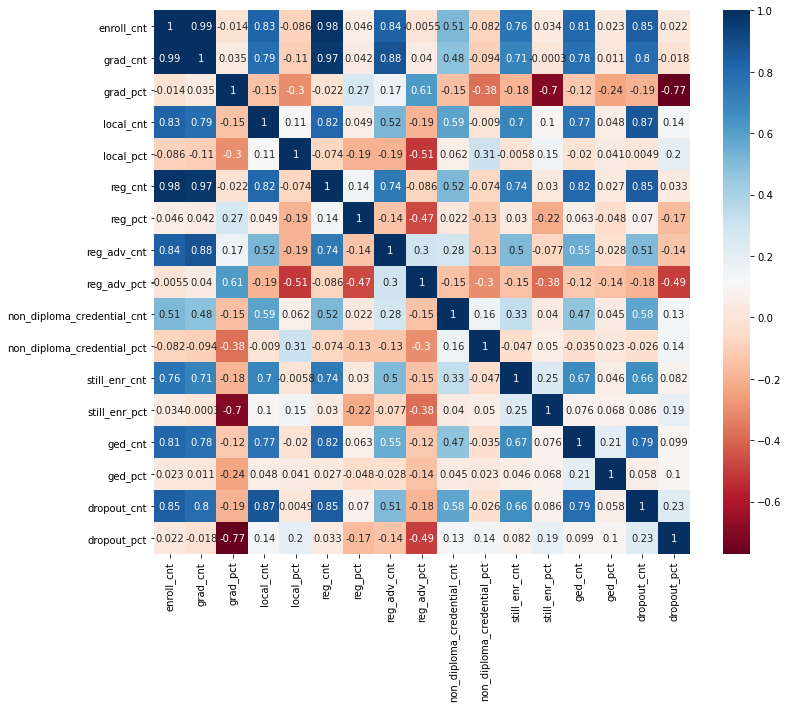

In [15]:
# View the correlation coefficient between numerical variables
# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))
corr = data_num.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
# Show the heatmap
plt.show()

- As previously written, the data distribution of enroll_cnt and grad cnt is highly similar. In addition, from the heatmap, they have a high correlation of 0.99. We will remove enroll cnt in the data preparation to eliminate the collinearity.
- We can notice that the correlation coefficient between attribute names ending in cnt (count) will generally be higher than attribute names ending in pct (percentage).
- The attribute reg_cnt has a high positive correlation with attributes of local_cnt,reg_adv_cnt,still_enroll_cnt,ged_cnt, and dropout cnt that the coefficients are over 0.7.
- For reg_pct, it has low relationships with other attributes. But among the coefficients, grad_pct and ged_cnt have a slightly higher positive correlation with reg_pct; reg_adv_pct and non_diploma_pct have a somewhat higher negative correlation with reg_pct. 
- The following attributes will be given priority in the subsequent numerical feature selection."local_cnt,reg_adv_cnt,still_enroll_cnt,ged_cnt,dropout_cnt,grad_pct,ged_cnt,non_diploma_pct".

Categorical data

In [16]:
data_cat = data[['nrc_code','nrc_desc','county_code','county_name','nyc_ind','membership_desc','subgroup_code','subgroup_name']]

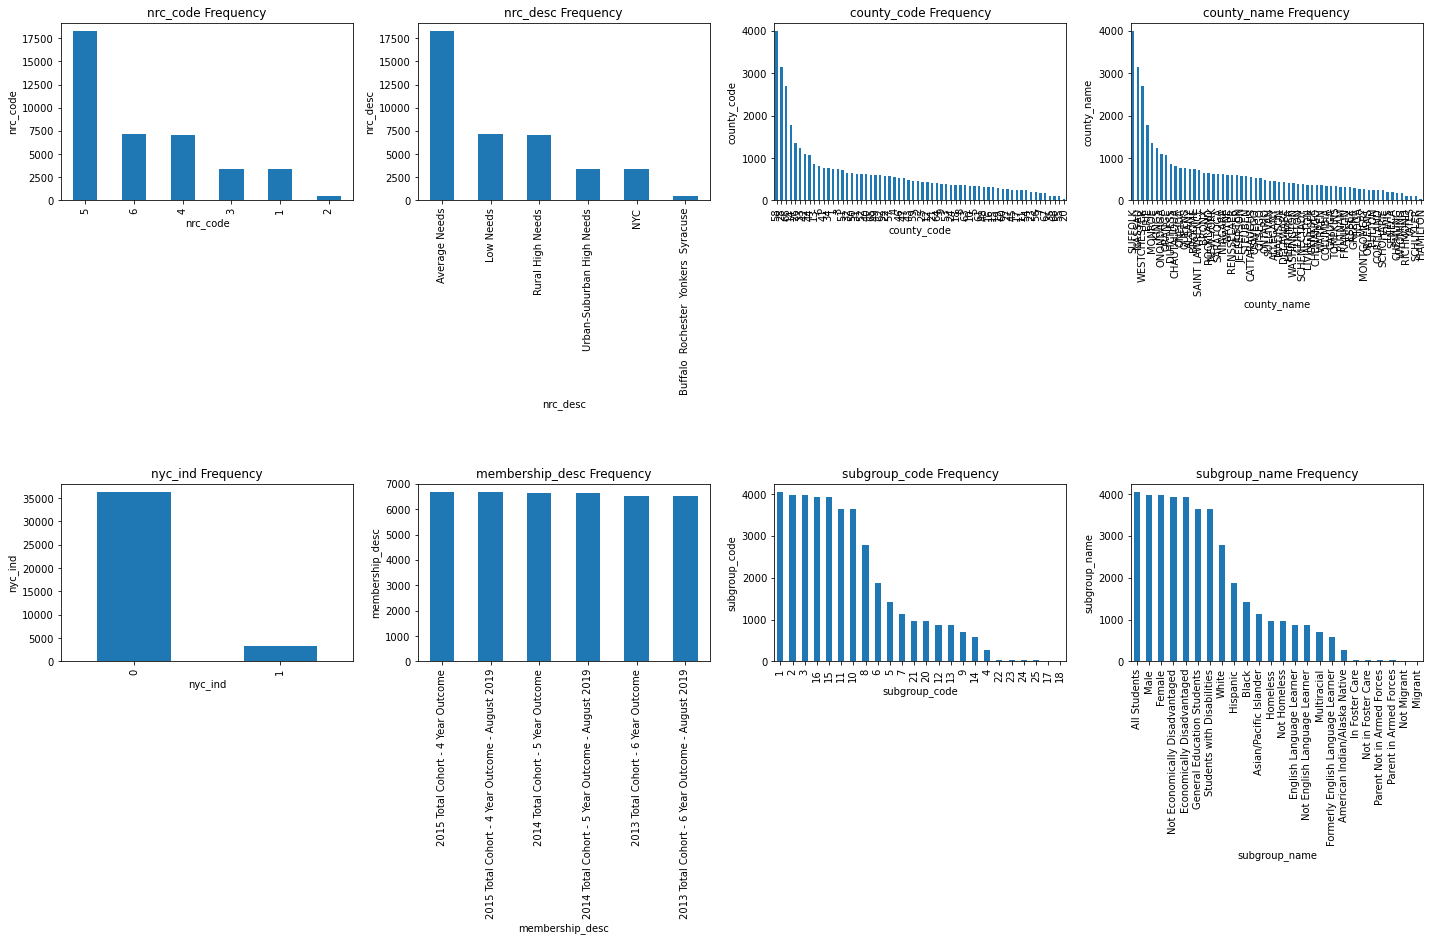

In [17]:
plt.figure(figsize = (20, 35))
for i, col in enumerate(data_cat):
    plt.subplot(6,4, i + 1)
    data_cat[col].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.title(str(col) + ' Frequency')
    plt.xlabel(col)
    plt.ylabel(col)

In [18]:
county_name_counts = data_cat.county_name.value_counts().to_frame().reset_index()
county_name_counts.columns = ['idx','counts']
total_counts = county_name_counts.counts.sum()
percentages = []
for c in county_name_counts.counts:
    percentages.append((c/total_counts) * 100)
county_name_counts['%'] = percentages
county_name_counts

,idx,counts,%
0,SUFFOLK,3996,10.072088
1,NASSAU,3152,7.944750
2,WESTCHESTER,2700,6.805465
3,ERIE,1770,4.461360
4,MONROE,1356,3.417856
...,...,...,...
57,WYOMING,174,0.438574
58,RICHMOND,108,0.272219
59,YATES,100,0.252054
60,SCHUYLER,94,0.236931


In [19]:
subgroup_name_counts = data_cat.subgroup_name.value_counts().to_frame().reset_index()
subgroup_name_counts.columns = ['idx','counts']
total_counts = subgroup_name_counts.counts.sum()
percentages = []
for c in subgroup_name_counts.counts:
    percentages.append((c/total_counts) * 100)
subgroup_name_counts['%'] = percentages
subgroup_name_counts

,idx,counts,%
0,All Students,4046,10.198115
1,Male,3970,10.006553
2,Female,3970,10.006553
3,Not Economically Disadvantaged,3918,9.875485
4,Economically Disadvantaged,3918,9.875485
5,General Education Students,3632,9.154610
6,Students with Disabilities,3632,9.154610
7,White,2790,7.032313
8,Hispanic,1878,4.733579
9,Black,1416,3.569088


- nrc_code & nrc_desc, county_code & county_name，subgroup_code & subgroup_name ：There are three sets of attributes that have exactly the same data distribution. In order to avoid repetition, we will not consider nrc_code，county_code and subgroup_code in subsequent data preparation. 
- county_name: We noticed that these two attributes have very many values. We can expect that after one-hot encoding, our number of columns will be huge. But we do not consider combining sparse data. As can be seen from the county name, the total number of combined sparse data will exceed the remaining individual county data. In order not to affect the accuracy of feature selection later, we will not combine sparse data
- nrc_desc: The top three frequency rankings are the type of school district and they are average needs, low needs, and rural high needs.
- nyc_ind: Most of the school districts are not reside within the borders of NYC.
- membership_desc: The data distribution of this attribute is very uniform. and there is no big difference when seen with the naked eye.
- county_name: The top three frequency rankings are the type of school district and they are SUFFOLK, NASSAU, WESTCHESTER.
- subgroup_name: The top three frequency rankings are the type of school district and they are all students, male, female.

## Data Preparation

In this section, we will do the following steps based on the EDA.
- create a new indicator variable named "reg_pct_level"
- One hot encoding for categorical data

In [20]:
# create a new indicator variable named “reg_pct_level” having the three possible categorizations described above (i.e., “low”, “medium”, and “high”)
reg_pct_level = []
for i in data['reg_pct']:
    if i < 0.5 * data['reg_pct'].median():
        reg_pct_level.append('low')
    elif i >1.5 * data['reg_pct'].median():
        reg_pct_level.append('high')
    else:
        reg_pct_level.append('medium')

In [21]:
data['reg_pct_level'] = reg_pct_level

In [22]:
data.drop(["reg_pct","reg_cnt", "enroll_cnt"],axis=1,inplace=True)

In [23]:
data.shape

(39674, 23)

In [24]:
data.head()

,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,grad_cnt,grad_pct,...,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,464.0,0.71,...,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22,medium
1,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,246.0,0.76,...,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20,medium
2,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,218.0,0.65,...,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25,medium
4,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,248.0,0.68,...,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25,medium
5,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,58.0,0.59,...,0.05,4.0,0.04,8.0,0.08,0.0,0.0,28.0,0.29,medium


In [25]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39674 entries, 0 to 73146
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nrc_code         39674 non-null  int64 
 1   nrc_desc         39674 non-null  object
 2   county_code      39674 non-null  int64 
 3   county_name      39674 non-null  object
 4   nyc_ind          39674 non-null  int64 
 5   membership_desc  39674 non-null  object
 6   subgroup_code    39674 non-null  int64 
 7   subgroup_name    39674 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.7+ MB


In [26]:
data_cat_update = data_cat.iloc[:,[1,3,4,5,7]]
data_cat_update.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic


In [27]:
# Convert to DUMMY VARIABLES
enc = OneHotEncoder(categories='auto').fit(data_cat_update)
result = enc.transform(data_cat_update).toarray()
df_cat_enc = pd.DataFrame(result)

In [28]:
# Check column name
enc.get_feature_names()

array(['x0_Average Needs', 'x0_Buffalo  Rochester  Yonkers  Syracuse',
       'x0_Low Needs', 'x0_NYC', 'x0_Rural High Needs',
       'x0_Urban-Suburban High Needs', 'x1_ALBANY', 'x1_ALLEGANY',
       'x1_BRONX', 'x1_BROOME', 'x1_CATTARAUGUS', 'x1_CAYUGA',
       'x1_CHAUTAUQUA', 'x1_CHEMUNG', 'x1_CHENANGO', 'x1_CLINTON',
       'x1_COLUMBIA', 'x1_CORTLAND', 'x1_DELAWARE', 'x1_DUTCHESS',
       'x1_ERIE', 'x1_ESSEX', 'x1_FRANKLIN', 'x1_FULTON', 'x1_GENESEE',
       'x1_GREENE', 'x1_HAMILTON', 'x1_HERKIMER', 'x1_JEFFERSON',
       'x1_KINGS', 'x1_LEWIS', 'x1_LIVINGSTON', 'x1_MADISON', 'x1_MONROE',
       'x1_MONTGOMERY', 'x1_NASSAU', 'x1_NEW YORK', 'x1_NIAGARA',
       'x1_ONEIDA', 'x1_ONONDAGA', 'x1_ONTARIO', 'x1_ORANGE',
       'x1_ORLEANS', 'x1_OSWEGO', 'x1_OTSEGO', 'x1_PUTNAM', 'x1_QUEENS',
       'x1_RENSSELAER', 'x1_RICHMOND', 'x1_ROCKLAND', 'x1_SAINT LAWRENCE',
       'x1_SARATOGA', 'x1_SCHENECTADY', 'x1_SCHOHARIE', 'x1_SCHUYLER',
       'x1_SENECA', 'x1_STEUBEN', 'x1_SUFFOLK', '

In [29]:
df_cat_enc.columns = ['x0_Average Needs', 'x0_Buffalo  Rochester  Yonkers  Syracuse',
       'x0_Low Needs', 'x0_NYC', 'x0_Rural High Needs',
       'x0_Urban-Suburban High Needs', 'x1_ALBANY', 'x1_ALLEGANY',
       'x1_BRONX', 'x1_BROOME', 'x1_CATTARAUGUS', 'x1_CAYUGA',
       'x1_CHAUTAUQUA', 'x1_CHEMUNG', 'x1_CHENANGO', 'x1_CLINTON',
       'x1_COLUMBIA', 'x1_CORTLAND', 'x1_DELAWARE', 'x1_DUTCHESS',
       'x1_ERIE', 'x1_ESSEX', 'x1_FRANKLIN', 'x1_FULTON', 'x1_GENESEE',
       'x1_GREENE', 'x1_HAMILTON', 'x1_HERKIMER', 'x1_JEFFERSON',
       'x1_KINGS', 'x1_LEWIS', 'x1_LIVINGSTON', 'x1_MADISON', 'x1_MONROE',
       'x1_MONTGOMERY', 'x1_NASSAU', 'x1_NEW YORK', 'x1_NIAGARA',
       'x1_ONEIDA', 'x1_ONONDAGA', 'x1_ONTARIO', 'x1_ORANGE',
       'x1_ORLEANS', 'x1_OSWEGO', 'x1_OTSEGO', 'x1_PUTNAM', 'x1_QUEENS',
       'x1_RENSSELAER', 'x1_RICHMOND', 'x1_ROCKLAND', 'x1_SAINT LAWRENCE',
       'x1_SARATOGA', 'x1_SCHENECTADY', 'x1_SCHOHARIE', 'x1_SCHUYLER',
       'x1_SENECA', 'x1_STEUBEN', 'x1_SUFFOLK', 'x1_SULLIVAN', 'x1_TIOGA',
       'x1_TOMPKINS', 'x1_ULSTER', 'x1_WARREN', 'x1_WASHINGTON',
       'x1_WAYNE', 'x1_WESTCHESTER', 'x1_WYOMING', 'x1_YATES', 'x2_0',
       'x2_1', 'x3_2013 Total Cohort - 6 Year Outcome',
       'x3_2013 Total Cohort - 6 Year Outcome - August 2019',
       'x3_2014 Total Cohort - 5 Year Outcome',
       'x3_2014 Total Cohort - 5 Year Outcome - August 2019',
       'x3_2015 Total Cohort - 4 Year Outcome',
       'x3_2015 Total Cohort - 4 Year Outcome - August 2019',
       'x4_All Students', 'x4_American Indian/Alaska Native',
       'x4_Asian/Pacific Islander', 'x4_Black',
       'x4_Economically Disadvantaged', 'x4_English Language Learner',
       'x4_Female', 'x4_Formerly English Language Learner',
       'x4_General Education Students', 'x4_Hispanic', 'x4_Homeless',
       'x4_In Foster Care', 'x4_Male', 'x4_Migrant', 'x4_Multiracial',
       'x4_Not Economically Disadvantaged',
       'x4_Not English Language Learner', 'x4_Not Homeless',
       'x4_Not Migrant', 'x4_Not in Foster Care',
       'x4_Parent Not in Armed Forces', 'x4_Parent in Armed Forces',
       'x4_Students with Disabilities', 'x4_White']

In [30]:
# Replace low medium high with 1,2,3
data.reg_pct_level.replace(['low','medium','high'], [1,2,3], inplace = True)

In [31]:
# drop the duplicated columns
data.drop(['nrc_desc','county_name','nyc_ind','membership_desc','subgroup_name','nrc_code','county_code','subgroup_code'],axis=1,inplace=True)

In [32]:
data.index = range(data.shape[0])

In [33]:
df = pd.concat([df_cat_enc,data],axis=1)
df.shape

(39674, 115)

In [34]:
df.head()

,x0_Average Needs,x0_Buffalo Rochester Yonkers Syracuse,x0_Low Needs,x0_NYC,x0_Rural High Needs,x0_Urban-Suburban High Needs,x1_ALBANY,x1_ALLEGANY,x1_BRONX,x1_BROOME,...,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22,2
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20,2
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25,2
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25,2
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.05,4.0,0.04,8.0,0.08,0.0,0.0,28.0,0.29,2


## Prepped Data Review

In this section,we will re-run EDA on the variables adjusted during data preparation work.

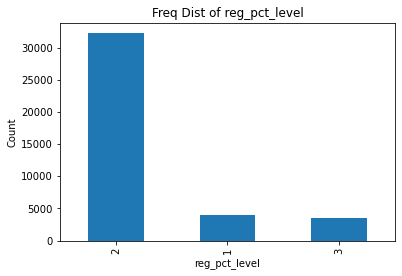

In [35]:
# Create a bar plot for the "reg_pct_level" attribute
bplt1 = df['reg_pct_level'].value_counts().plot.bar(title = "Freq Dist of reg_pct_level")
plt.xlabel('reg_pct_level')
plt.ylabel('Count')
bplt1;

- From the above barplot, we can find most of the percentage of enrolled students of the indicated subgrouping was awarded a "Regents" diploma is medium level. The "medium" means that the percentage of regents diplomas awarded for a given school district/student subgrouping is between 0.5 * the median percentage of all regent certificates awarded and 1.5 * the median percentage of all regent diplomas awarded.
- The values of "Low" and "high" account for much less than the "medium" in the total number of regent diplomas. The ratio between low and medium is 1:8. The ratio between high and medium is 1:9.

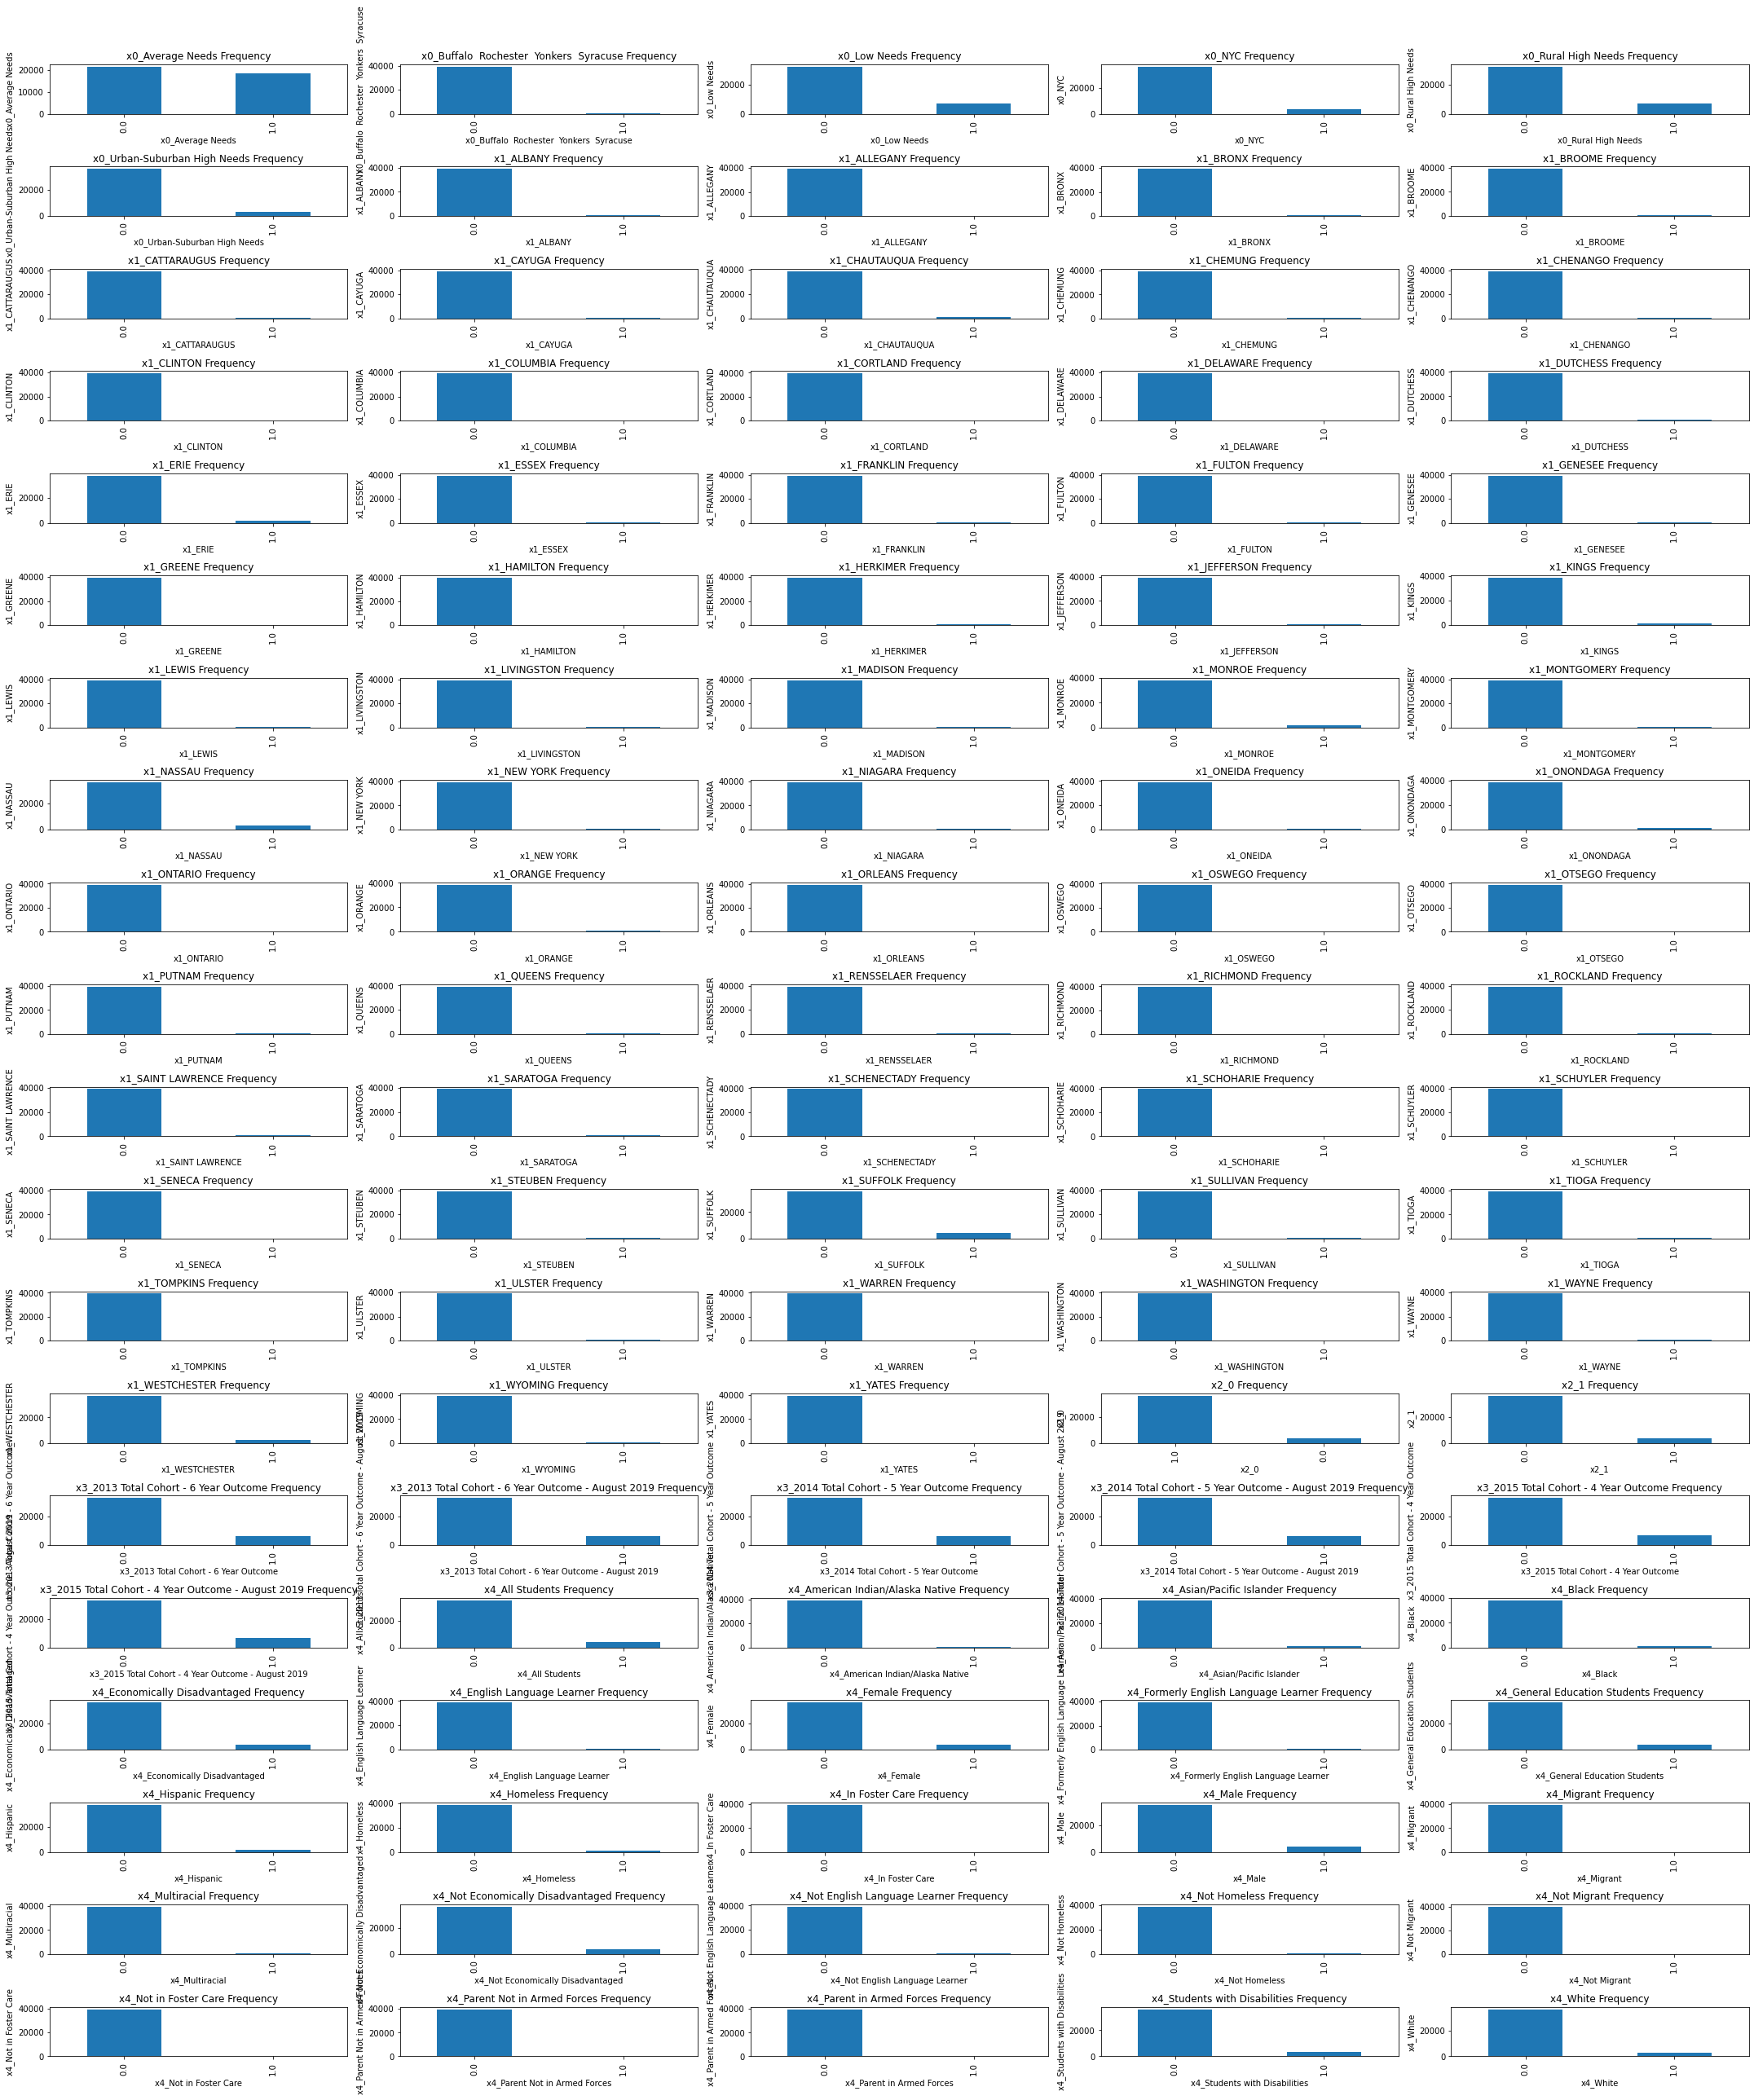

In [36]:
# Re-eda categorical data
plt.figure(figsize = (30, 35))
for i, col in enumerate(df_cat_enc):
    plt.subplot(20,5, i + 1)
    df_cat_enc[col].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.title(str(col) + ' Frequency')
    plt.xlabel(col)
    plt.ylabel(col)

From the above, we can see that all categorical variables have successfully converted to dummy variables, and except for 'Average Needs', 0 is far more than 1 in other attributes.

In addition to deleting the three numerical attributes, we have not made any adjustments to the other numerical attributes.

## Decision Tree + Random Forest Modeling

In this section, we will do feature selection and create two decision tree models and two random forest models.

- We will use the chi-square test to select the top 10 categorical features as one of the explanatory variables in the first decision tree model and the first random forest model. The reason we use it is that the method is to test the independence of two variables. We can measure how expected observed values and expected values deviate from each other. 
- We will use the f_regression test (linear dependency) to select the top five numerical features as the first features for modeling. Then, according to the results of the EDA heatmap, we will replace two of the features in feature 1. 
- In feature selection, we aim to select the features which are highly dependent on the response. A higher score means more dependent variables.

In [37]:
# Select features for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_cat_enc
y = df.iloc[:,-1]
print("Feature data dimension: ", X.shape)
print("----")
select = SelectKBest(score_func=chi2, k=10)
fit = select.fit(X,y)
# type(fit)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# Print 10 best features
print(featureScores.nlargest(10,'Score'))

Feature data dimension:  (39674, 100)
----
                                Features        Score
65                        x1_WESTCHESTER  4148.504631
2                           x0_Low Needs  1850.053776
83  x4_Formerly English Language Learner  1680.292473
98         x4_Students with Disabilities  1211.575122
81           x4_English Language Learner  1190.539056
35                             x1_NASSAU  1146.290516
78             x4_Asian/Pacific Islander  1118.970992
0                       x0_Average Needs   396.215526
57                            x1_SUFFOLK   365.340701
80         x4_Economically Disadvantaged   298.979239


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=14)
X = df.iloc[:,-15:-1]
y = df.iloc[:,-1]
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# Naming the dataframe columns
featureScores.columns = ['Features','Score'] 
# Print 5 best features
print(featureScores.nlargest(14,'Score'))

                      Features        Score
5                  reg_adv_pct  4437.455314
1                     grad_pct  3372.879392
9                still_enr_pct  1921.850225
3                    local_pct  1522.939577
13                 dropout_pct  1434.534447
7   non_diploma_credential_pct   771.586465
4                  reg_adv_cnt   378.213964
11                     ged_pct   108.169464
6   non_diploma_credential_cnt    16.748109
10                     ged_cnt    10.030138
0                     grad_cnt     5.709495
12                 dropout_cnt     2.739529
8                still_enr_cnt     2.064726
2                    local_cnt     0.008202


In [39]:
x1 = df[['x1_WESTCHESTER', 'x0_Low Needs','x4_Formerly English Language Learner', 
         'x4_Students with Disabilities', 'x4_English Language Learner', 'x1_NASSAU', 
         'x4_Asian/Pacific Islander', 'x0_Average Needs','x1_SUFFOLK','x4_Economically Disadvantaged',
         'reg_adv_pct','grad_pct','still_enr_pct','local_pct','dropout_pct']]

In [40]:
x2 = df[['x1_WESTCHESTER', 'x0_Low Needs',
       'x1_NASSAU', 'x4_Formerly English Language Learner', 'x4_Students with Disabilities', 
       'x4_English Language Learner', 'x0_Average Needs','x2_0', 'x4_Asian/Pacific Islander','x4_Economically Disadvantaged',
        'reg_adv_pct','non_diploma_credential_pct','still_enr_pct','local_pct','ged_pct']]

In [41]:
from sklearn.model_selection import train_test_split
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=12)

In [42]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=12)

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Decision Tree 1

 hyperparameters:
 - max_depth: The maximum depth of the tree. We will use cross-validation(10 fold) to find the optimal maximum depth of the tree.
 - class_weight: Weights associated with classes in the form {class_label: weight}.  Use class weights when we have an imbalanced dataset and want to improve single-label classification results. Class weights on the Peltarion Platform are inversely proportional to the class frequency in the training data.
 - criterion = 'gini': It measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled. The gini criterion is much faster than entropy with less computationally expensive. The results of gini are very close to entropy, so we do not need to use the entropy criterion and spend too much time in training. 
( https://quantdare.com/decision-trees-gini-vs-entropy/ )

0.9875770528923045 19


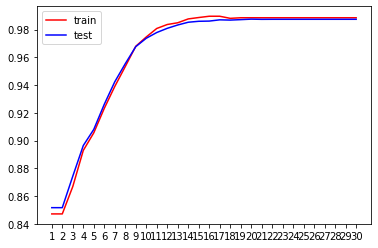

In [44]:
# Find the optimal max_depth 
tr = []
te = []
for i in range(30):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion = 'gini')
    clf = clf.fit(X1_train, y1_train)
    score_tr = clf.score(X1_test, y1_test)
    score_te = cross_val_score(clf,X1_train,y1_train,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te),te.index(max(te)))
plt.plot(range(1,31),tr,color="red",label="train")
plt.plot(range(1,31),te,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

Under normal circumstances, decision trees will be over-fitting in the training set. From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 19, so we choose 19 for the maximum depth.

In [45]:
# Value_count the reg_pct_level
df['reg_pct_level'].value_counts() / df['reg_pct_level'].shape[0]

2    0.813077
1    0.098679
3    0.088244
Name: reg_pct_level, dtype: float64

Use class weights when you have an imbalanced dataset and want to improve single-label classification results. Class weights on the Peltarion Platform are inversely proportional to the class frequency in the training data.

In [46]:
dt1 = DecisionTreeClassifier(random_state=25,max_depth=19,criterion = 'gini',
                             class_weight = {2: 1.0, 1: 8.0, 3:9.0})
DT1 = dt1.fit(X1_train, y1_train)

### Decision Tree 2

0.9352924477601029 26


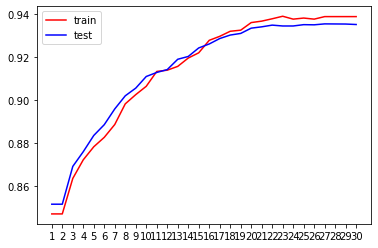

In [47]:
# Find the optimal max_depth 
tr = []
te = []
for i in range(30):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion = 'gini')
    clf = clf.fit(X2_train, y2_train)
    score_tr = clf.score(X2_test, y2_test)
    score_te = cross_val_score(clf,X2_train,y2_train,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te),te.index(max(te)))
plt.plot(range(1,31),tr,color="red",label="train")
plt.plot(range(1,31),te,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

Under normal circumstances, decision trees will be over-fitting in the training set. From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 26, so we choose 26 for the maximum depth.

In [48]:
dt2 = DecisionTreeClassifier(random_state=25,max_depth=26,criterion = 'gini',
                             class_weight = {2: 1.0, 1: 8.0, 3:9.0})
DT2 = dt2.fit(X2_train, y2_train)

### Random Forset 1

hyperparameters:
- n_estimators: The number of trees in the forest. We will use cross validation to find the optimal estimators.
- n_jobs:The number of jobs to run in parallel.  -1 means using all processors.
- max_depth: The maximum depth of the tree.We will use cross validation to find the optimal estimators.

In [49]:
from sklearn.ensemble import RandomForestClassifier

0.9835440921298135 101


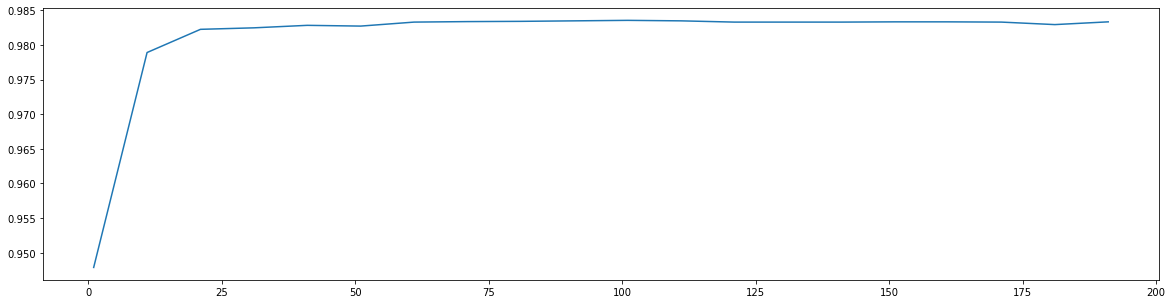

In [52]:
# Find the optimal estimators
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=25)
    score = cross_val_score(rfc,X1_train,y1_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

From this plot, we can see that when n_estimators = 101, the accuracy of this model reaches the highest point, so we choose 101 as of this model's n_estimators.

0.9835801151752296 27


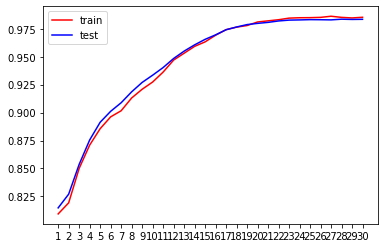

In [55]:
# Find the optimal max_depth 
rfr = []
rfe = []
for i in range(30):
    clf = RandomForestClassifier(random_state=25,max_depth=i+1,criterion = 'gini', n_estimators=101, n_jobs=-1)
    clf = clf.fit(X1_train, y1_train)
    score_rfr = clf.score(X1_test, y1_test)
    score_rfe = cross_val_score(clf,X1_train,y1_train,cv=10).mean()
    rfr.append(score_rfr)
    rfe.append(score_rfe)
print(max(rfe),rfe.index(max(rfe)))
plt.plot(range(1,31),rfr,color="red",label="train")
plt.plot(range(1,31),rfe,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 27, so we choose 27 for the maximum depth.

In [56]:
rfc1 = RandomForestClassifier(n_estimators=101,n_jobs=-1,random_state=25,max_depth = 27,class_weight = {2: 1.0, 1: 8.0, 3:9.0})
RFC1 = rfc1.fit(X1_train, y1_train)

### Random Forset 2

0.9487237549624045 151


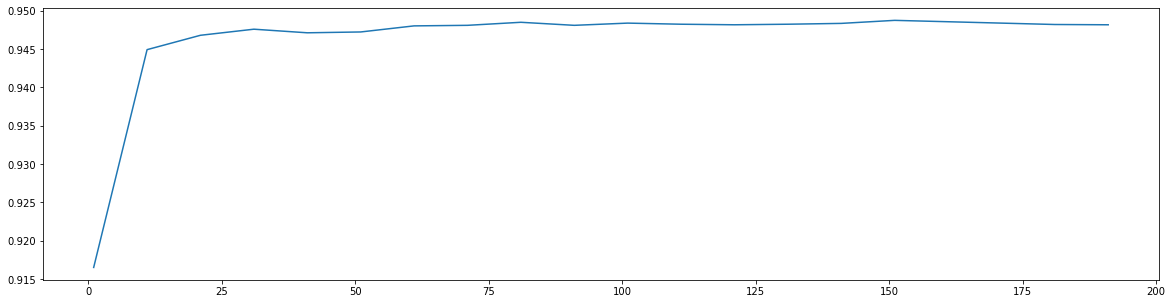

In [57]:
# Find the optimal estimators
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=25)
    score = cross_val_score(rfc,X2_train,y2_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

From this plot, we can see that when n_estimators = 151, the accuracy of this model reaches the highest point, so we choose 151 as of this model's n_estimators.

0.9487598168955991 28


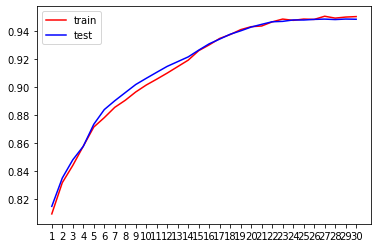

In [58]:
# Find the optimal max_depth 
rfr = []
rfe = []
for i in range(30):
    clf = RandomForestClassifier(random_state=25,max_depth=i+1,criterion = 'gini', n_estimators=151, n_jobs=-1)
    clf = clf.fit(X2_train, y2_train)
    score_rfr = clf.score(X2_test, y2_test)
    score_rfe = cross_val_score(clf,X2_train,y2_train,cv=10).mean()
    rfr.append(score_rfr)
    rfe.append(score_rfe)
print(max(rfe),rfe.index(max(rfe)))
plt.plot(range(1,31),rfr,color="red",label="train")
plt.plot(range(1,31),rfe,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 28, so we choose 28 for the maximum depth.

In [59]:
rfc2 = RandomForestClassifier(n_estimators=151,n_jobs=-1,random_state=25,max_depth=28,class_weight = {2: 1.0, 1: 8.0, 3:9.0})
RFC2 = rfc2.fit(X2_train, y2_train)

## Select Models

In [60]:
accuracyDT1 = cross_val_score(dt1,X1_train,y1_train,cv=10).mean()
accuracyDT1

0.9874330255236046

In [61]:
accuracyDT2 = cross_val_score(dt2,X2_train,y2_train,cv=10).mean()
accuracyDT2

0.935580632123431

In [62]:
accuracyRFC1 = cross_val_score(rfc1,X1_train,y1_train,cv=10).mean()
accuracyRFC1

0.982679992730578

In [63]:
accuracyRFC2 = cross_val_score(rfc2,X2_train,y2_train,cv=10).mean()
accuracyRFC2

0.9486157117513422

In [64]:
precisionDT1 = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='precision_macro').mean()
precisionDT1

0.9779980600454017

In [65]:
precisionDT2 = cross_val_score(dt2,X2_train,y2_train,cv=10,scoring='precision_macro').mean()
precisionDT2

0.8571648373166563

In [66]:
precisionRFC1 = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='precision_macro').mean()
precisionRFC1

0.9816597591162634

In [67]:
precisionRFC2 = cross_val_score(rfc2,X2_train,y2_train,cv=10,scoring='precision_macro').mean()
precisionRFC2

0.8965499304158431

In [68]:
recallDT1 = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='recall_macro').mean()
recallDT1

0.9719458532063339

In [69]:
recallDT2 = cross_val_score(dt2,X2_train,y2_train,cv=10,scoring='recall_macro').mean()
recallDT2

0.8892583096948531

In [70]:
recallRFC1 = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='recall_macro').mean()
recallRFC1

0.9486334574133561

In [71]:
recallRFC2 = cross_val_score(rfc2,X2_train,y2_train,cv=10,scoring='recall_macro').mean()
recallRFC2

0.8919659637335837

In [72]:
f1DT1 = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='f1_macro').mean()
f1DT1

0.9749225921077734

In [73]:
f1DT2 = cross_val_score(dt2,X2_train,y2_train,cv=10,scoring='f1_macro').mean()
f1DT2

0.8722761081319013

In [74]:
f1RFC1 = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='f1_macro').mean()
f1RFC1

0.9645216288839435

In [75]:
f1RFC2 = cross_val_score(rfc2,X2_train,y2_train,cv=10,scoring='f1_macro').mean()
f1RFC2

0.8940202608172421

| Metric        | Model dt1 | Model dt2 | Model rfc1 | Model rfc2
| ------------- | ------- | -------      |------    |-------
| # Indep. Vars |  15     |   15      |   15    |   15         
| Accuracy      | 0.98743  | 0.93558     | 0.98267   | 0.94861 
| Precision     | 0.97799  | 0.85716    | 0.98165   | 0.89654
| Recall   | 0.97194  | 0.88925         | 0.94863   | 0.89196
| F1 Score      | 0.97492  | 0.87227     | 0.96452   | 0.89402

- As our response variable is imbalanced, so we will not consider accuracy as our comparison condition.

- __Decision tree Model 1 vs. Random forest Model 1__:
The precision of the decision tree model has a lower score than the random forest model 1. However, the recall and F1 scores were slightly higher than the random forest model 1. 
- __Decision tree Model 2 vs. Random forest Model 2__:
The precision, recall, and F1 score of random forest model 2 was higher than the decision tree model 2, especially for the precision. The difference was around 4.4%. 
- __Models_1 vs Models_2__:
We also noticed that both models 2 were lower than the models_1 because the correlation between explanatory and response variables in model 2 is not as strong as in model 1. 

So, we will choose decision tree model 1 as our preferred model.

In [76]:
# predict class labels for the test set
predicted = dt1.predict(X1_test)
predicted

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

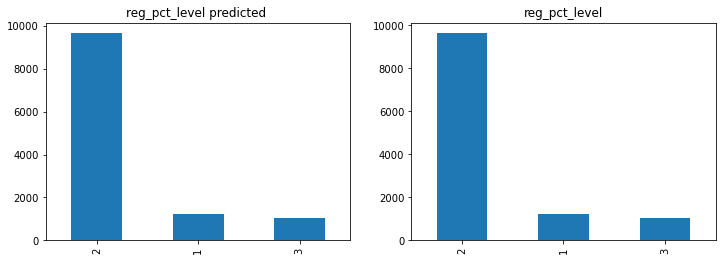

predicted:  2    9641
1    1217
3    1045
Name: reg_pct_level, dtype: int64
2    9633
1    1210
3    1060
Name: reg_pct_level, dtype: int64


In [77]:
# Make two bar plots to display the actual and predict reg_pct_level data distribution 
predicted1 = pd.DataFrame(predicted,columns=['reg_pct_level'])
plt.figure(figsize=(12,4))
# Plot 1 
plt.subplot(1,2,1)
predicted1.reg_pct_level.value_counts().plot(kind='bar');
plt.title('reg_pct_level predicted ')
# Plot 2
plt.subplot(1,2,2)
y1_test.value_counts().plot(kind='bar');
plt.title('reg_pct_level')
plt.show()

print("predicted: ",predicted1.reg_pct_level.value_counts())
print(y1_test.value_counts())

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y1_test, predicted1))
print(classification_report(y1_test, predicted1))

[[1176   34    0]
 [  41 9575   17]
 [   0   32 1028]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      1210
           2       0.99      0.99      0.99      9633
           3       0.98      0.97      0.98      1060

    accuracy                           0.99     11903
   macro avg       0.98      0.98      0.98     11903
weighted avg       0.99      0.99      0.99     11903



The average testing score(precision, recall, f1) of decision tree model 1 is over 0.98, better than the train set score(precision, recall, f1) of 0.97. The preferred model performs as well as expected.

## Conclusion

- In this project,we created a new categorical indicator variable (reg_pct_level) derived from the content of the reg_pct attribute as our response variable. 
- We constructed two decision tree models and two random forest models with two different explanatory variables.
- Then, we use the preferred model(decision tree model 1) to test the subset and we have got the results as well as we expected.
- In general, in the case of the same data set, the performance of the random forest is better than the decision tree, but we get the opposite result, so further improving in feature selection and model optimization will optimize the performance of the random forset model.

# Reference
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html